# $$IBO: \:Intelligent\:Bayesian\:Optimization$$

In [3]:
import IPython

$$Hyperparameter\: Selection$$
- This package focused on hyperparameter selection for the underlying model, not for the Gaussian Process kernel

# Resources
- Bay_Opt : http://haikufactory.com/files/bayopt.pdf
- Kat Baily : http://katbailey.github.io/post/gaussian-processes-for-dummies/
- C. E. Rasmussen & C. K. I. Williams,  : http://www.gaussianprocess.org/
- Kevin Murphy - Machine Learning a Probabilistic Perspective: https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020
- Thomas Huijskens: https://thuijskens.github.io/2016/12/29/bayesian-optimisation/
- Kernels : http://www.cs.toronto.edu/~duvenaud/cookbook/index.html
- Ruben Cantin : https://arxiv.org/pdf/1405.7430.pdf

## Introduction

- Bayesian Optimization is a technique used to find the global maxima of functions that tend to be expensive to evaluate. 
- Bayesian Optimization is a type of **black box** optimization techniques. This means that our understanding of the objective function is limited to querying a point and getting back a response. 
    - This also means that we need to define the domain over which we are seraching for bayesian optimization

- The reason why it is called bayesian optimization is that is uses bayes rule to update your enderstanding of the underlying function. This involves taking your likelihood function, P( B|A ), multipled by your prior knowledge of P( A ) to arrive at your posterior P (A|B ). In most cases, A are your parameters and B is your data.

 $${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}}$$
 
- Typically, we drop the denomiator and arrive at an approximation for the posterior. This simplifies the calculation, and the resulting maximum of this aproximate posterior has the same parameter if we divided by the normalization constant.
 

 $${\displaystyle P(A\mid B)\approx{ {P(B\mid A)\,P(A)}{}}}$$
 
 - Next, we attempt to maximize this posterior function which will in turn find the maximum of the underlying function.
 - The statistical model used to accomplish this goal is called **gaussian processes**.

## Gaussian Processes

$$Gaussian\:Prior$$


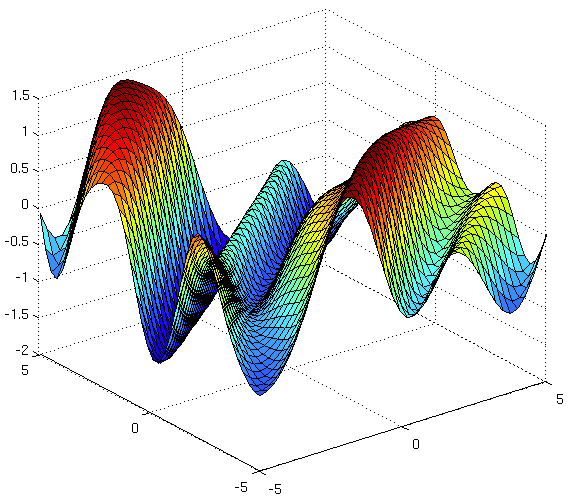

In [5]:
IPython.display.Image("images/gaussian_process.png")


Source: http://katbailey.github.io/images/kernel_cookbook.png

- A GP defines a prior over functions, which can be converted into a posterior over functions once we have seen some data (Kevin Murphy).
- A gaussian process is a type of model where observations occur in a continuous domain. For each point from a gaussian process, there is a corresponding normally distributed random variable. One easy way to think about Gaussian Process is as a distribution of distributions. The distribution of a gaussian process is the joint distribution of all of the points in domain.

>- For every point in the domain, the relationship between points is defined by a kernel or covariance kernel. There are a multitude of kernels which in turn make assumptions about how each of the points are related to eachother.
    - **RBF (squarred exponential kernel):** It is universal, and you can integrate it against most functions that you need to. Every function in its prior has infinitely many derivatives. It also has only two parameters.
    - **Quadratic**: It is a good choice for smooth functions.
    - **Brownian motion**: It is the integral of a white noise Gaussian process.  It is not stationary, but it has stationary increments.
    
- Info on kernels: http://www.wikiwand.com/en/Gaussian_process
    
- Typically, a gaussian process is have a zero mean prior which means that the entire model is defined only by the kernel (covariance function). Therefore, you can write the model as shown below where **m** is the mean (or mean vector) and **K** is the covariance (or covariance matrix).
$$ X=GP(m,K)$$

## $$Kernels$$


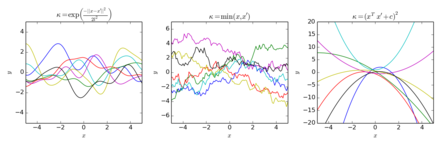

In [9]:
IPython.display.Image("images/gaussian_process_kernels.png" ,height = "500" ,width ="750")

Source: http://katbailey.github.io/images/kernel_cookbook.png


$$Left\:is\:a \:squared \:exponential\: kernel.\: Middle\: is \:brownian \:motion.\: Right\: is \:quadratic.$$
Source: http://www.wikiwand.com/en/Gaussian_process


*Popular Kernels*
- **RBF kernel**
$${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}$$
- **Matern kernel**
$${\displaystyle C_{\nu }(d)=\sigma ^{2}{\frac {2^{1-\nu }}{\Gamma (\nu )}}{\Bigg (}{\sqrt {2\nu }}{\frac {d}{\rho }}{\Bigg )}^{\nu }K_{\nu }{\Bigg (}{\sqrt {2\nu }}{\frac {d}{\rho }}{\Bigg )}},$$
    - where $ {\displaystyle \Gamma } $ is the gamma function, ${\displaystyle K_{\nu }} $ is the modified Bessel function of the second kind, and ρ and ν are non-negative parameters of the covariance


- A gaussian process is a non-parametric machine learning approach to learn an underlying function. For each test point, the kernel (or covariance function) is used to predict the resulting value. The imposes your belief of the relationship between points in the domain. This resulting value has two parts, a mean and a variance which together form a normal distribution.

### $$Each \:point\: sampled \:from\: a\: gaussian\: process\: has\: a\: mean\: and\: variance\: shown\: below$$


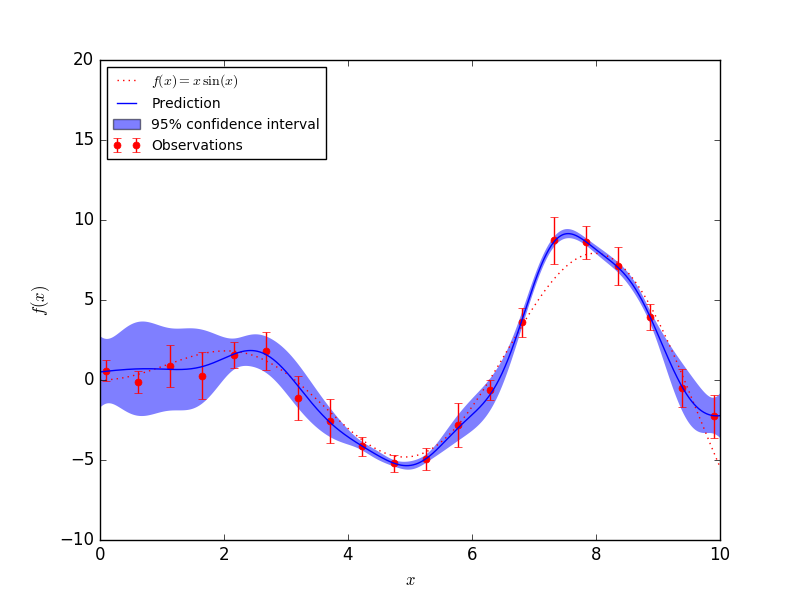

In [11]:
IPython.display.Image("images/gaussian_process_point_normal.png")


Source: http://scikit-learn.org/stable/_images/sphx_glr_plot_gpr_noisy_targets_002.png

### Update and predict from your Gaussian Process
Source: https://en.wikipedia.org/wiki/Gaussian_process

- To predict the points in your posterior, a series of linear algebra transformations applied to your covariance functions must happen

$$A=K(\theta ,x^{*},x)K(\theta ,x,x')^{-1}f(x)$$

- **A** here is the mean, or vectors of means, returned from your gaussian process.

$$B=K(\theta ,x^{*},x^{*})-K(\theta ,x^{*},x)K(\theta ,x,x')^{-1}K(\theta ,x^{*},x)^{T}$$

- **B** here is the variance, or vector of variances, returned from your gaussian predictive distribution
- Above,  ${\displaystyle K(\theta ,x,x')}$ is the covariance matrix between all possible pairs ${\displaystyle (x,x')}$for a given set of hyperparameters θ
> - Due to the matrix inversion taking $O(n^3)$ time, the Cholesky decomposition is typically used to find these predicted means and variances. https://en.wikipedia.org/wiki/Cholesky_decomposition
  - "We compared different numerical solutions and we found
that the Cholesky decomposition method outperforms any other method in terms of performance
and numerical stability." ( https://arxiv.org/pdf/1405.7430.pdf)
  - "Thus, instead of computing the whole Cholesky decomposition, being O(n^
3
) we just add the new
row of elements to the triangular matrix, which is O(n^
2)"( https://arxiv.org/pdf/1405.7430.pdf)

$$Cholesky\:Decomposition$$
$$\mathbf {A=LL} ^{*}$$
> - Here, "L is a lower triangular matrix with real and positive diagonal entries, and L* denotes the conjugate transpose of L." (https://en.wikipedia.org/wiki/Cholesky_decomposition)

 ### A (potential) problem with predicting new points is having matrices that are not positive definite (PD).
 - This occurs when one of your eigenvalues for your matrix is negative.
 - This means you ** can not invert your matrix**
 - A couple solutions include a 'Rank 1 update' 
    -  This involves find the eigenvector corresponding to your negative eigenvalue, taking the dot product of your vector V dot V.T, and adding it to your original matrix (https://www.mathworks.com/matlabcentral/answers/6057-repair-non-positive-definite-correlation-matrix)

#### For the kernel choosen, the way to find the best kernel hyperparameters is through maximizing the marginal log-likelihood function
$${\displaystyle \log p(f(x)|\theta ,x)=-{\frac {1}{2}}f(x)^{T}K(\theta ,x,x')^{-1}f(x)-{\frac {1}{2}}\log \det(K(\theta ,x,x'))-{\frac {|x|}{2}}\log 2\pi }$$
- You can use hill climbing on the gradient to find this value. Note, this was not implemented in this package.

# Bayesian Optimization
>## Setup
- 1) Pick the number of steps that you want to search
- 2) Define the testing domain
- 3) Define the kernel
- 4) Choose and acquisition function
- 5) Find a point that attempts to maximize the objective/underlying function
- 6) Rinse and repeat until you reach the number of steps you wanted to search

- Bayesian Optimization tyically uses gaussian processes due to the fact that;
    - 1) Guassian Processes can model any almost any underlying function (kinks and discontinuities are difficult to model depending on the kernel choosen)
    - 2) Gaussian Processes are a conjugate prior which means that bayesian inference, updating your posterior and you gain more knowledge, results in a new gaussian process. 

##  Acquisition Function

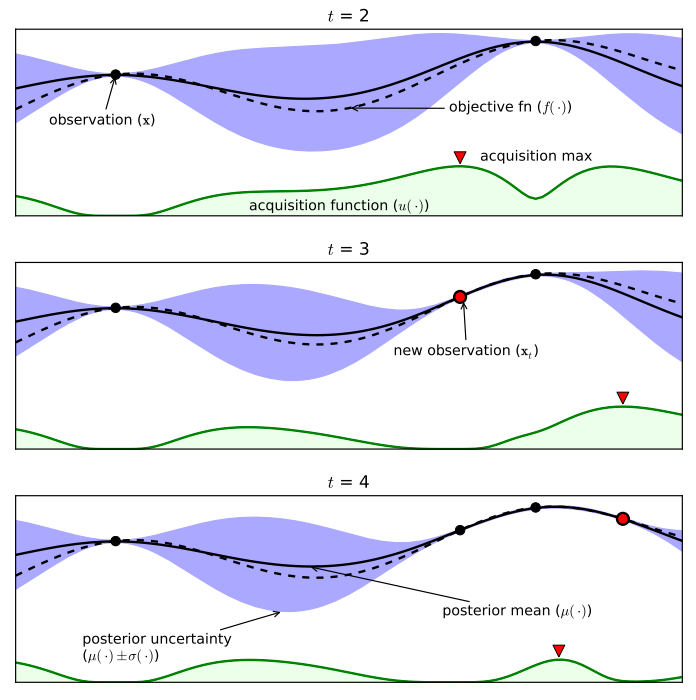

In [12]:
IPython.display.Image("images/acquisition_function.png")


Source: http://haikufactory.com/files/bayopt.pdf

- Above, we see the gaussian process modeled by the blue function, and the acquisition function on the bottom modeled by the green function.

- Acquisition functions are a way to explore, and exploit, an unknown parameter space. For bayesian optimization, we are not concerned with learning the exact representation of the underlying function. Instead, we want to find the maximum of the function. Therefore, most acquisition functions tend to look at points that either have high mean or a high variance.

- For this project, I implemented the **Expected Improvement** acquisition function.
> Other acquisition functions functions include:
    - Upper confidence bound
    - Thompson sampling

### $$Acquisition\:Function = Expected\: Improvement$$

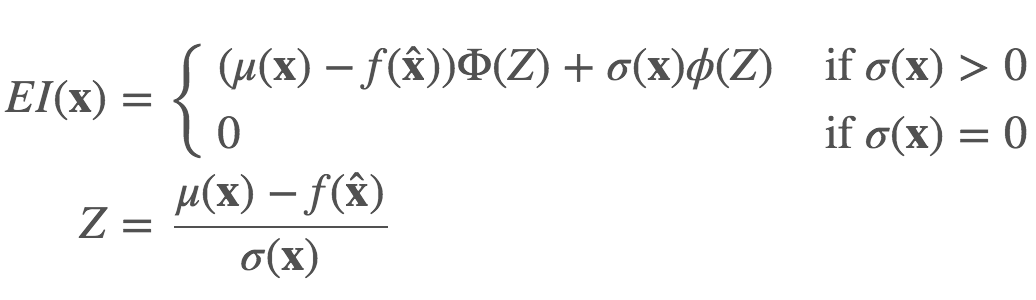

In [13]:
IPython.display.Image("images/expected_improvement.png")


Source: https://thuijskens.github.io/2016/12/29/bayesian-optimisation/

- Above $\mu(x)$ is the mean of the posterior distribution at that point. 
- $f(\hat{x})$ is the current best y-value from either the underlying function or your objective function
- $\sigma(x)$ is the standard deviation of the normal distribution from the point sampled from the gaussian process
- $\Phi(Z)$ is the cumulative distirbution from a standard normal of Z
- $\phi(Z)$ is the probability density distribution from a standard normal of Z
> - Therefore, EI(x) is high when either the expected value $\mu(x)$ is high, or the uncertainity $\sigma(x)$ is high

## Objective Function

- In bayesian optimization, you can either attempt to maximize and underlying function. Or, often you are attempting to maximize an objective function. This objective function is typically a measure of the loss from the machine learning model you are attempting to optimize.
- For example, in gradient boosting you can search over both the number of tree in your ensemble as well as the max depth of each tree. 
- Then or regression problems, you are attempting to minimize the RMSE.
- **Note**: Since bayesian optimization is a MAXIMIZATION procedure, I attempted to maximize the **negative root mean squarred error (NRMSE)** for regression tasks.

$$\operatorname{NRMSE}= -\sqrt{\frac{\sum_{t=1}^n (x_{1,t} - x_{2,t})^2}{n}}.$$

## Final Steps
- Now that we have defined all of the pieces for the bayesian optimization algorithm, we need to follow the following steps
- > 1) Given the observed values, update the posterior expectation of the underlying function 
- > 2) Find $X_{new}$ that maximizes the expected improvement
- > 3) Sample from the function using $X_{new}$ and see what the resulting value is $y_{new}$
- > 4) Append $X_{new}$ and $y_{new}$ to your list of training points and update the covariance matrices using these updated points